In [1]:
%matplotlib inline

In [26]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

In [20]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df["label"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df.columns = ["sepal length","sepal width","petal length","petal width","lebel"]
df.head()

,sepal length,sepal width,petal length,petal width,lebel
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


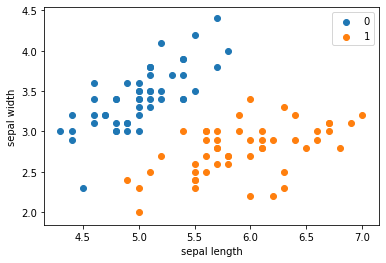

In [23]:
plt.scatter(df[:50]["sepal length"],df[:50]["sepal width"],label = "0")
plt.scatter(df[50:100]["sepal length"],df[50:100]["sepal width"],label = "1")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()
plt.show()

In [25]:
data = np.array(df.iloc[:100,[0,1,-1]])
X,y = data[:,:-1],data[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [41]:
class KNN():
    def __init__(self,X_train,y_train,n_neighbors = 3,p=2):
        self.X_train = X_train
        self.y_train = y_train
        self.p = p
        self.n = n_neighbors
    
    def predict(self,X):
        #先取出最近的N个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i],ord = self.p)
            knn_list.append((dist,self.y_train[i]))
            
        for i in range(self.n,len(self.X_train)):
            max_index = knn_list.index(max(knn_list,key = lambda x:x[0]))
            dist = np.linalg.norm(X - self.X_train[i],ord = self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist,self.y_train[i])
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
        max_counter = sorted(count_pairs.items(),key = lambda x:x[1])[-1][0]
        return max_counter

    def score(self,X_test,y_test):
        count_right = 0
        for X,y in zip(X_test,y_test):
            label = self.predict(X)
            if label == y:
                count_right += 1
        return count_right/len(X_test)

In [43]:
clf = KNN(X_train,y_train)

In [44]:
clf.score(X_test,y_test)

1.0

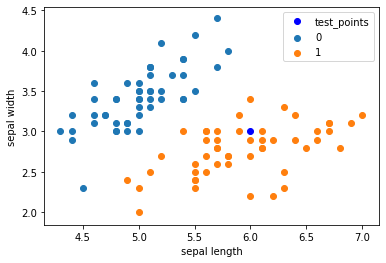

In [46]:
test_points = [6.0,3.0]
plt.scatter(df[:50]["sepal length"],df[:50]["sepal width"],label = "0")
plt.scatter(df[50:100]["sepal length"],df[50:100]["sepal width"],label = "1")
plt.plot(test_points[0],test_points[1],"bo",label = "test_points")
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier
clf_ck = KNeighborsClassifier()
clf_ck.fit(X_train,y_train)
clf_ck.score(X_test,y_test)

1.0